# 1

In [ ]:
import numpy as np 
from matplotlib import pyplot as plt 
brf = np.genfromtxt('/data9/UN3400/data/brf_temp.txt', delimiter = '\t')
brf

# 2

In [73]:
#2. Use the least squares method to fit a model to this data. 
N, i = np.shape(brf)
t = brf[:,0:1]
dobs = brf[:,1:2]

M = 3
G = np.zeros((N,M))
G[0:N,0:1] = np.ones((N,1))
G[0:N,1:2] = np.cos(((2 * np.pi)/365.25)* t)
G[0:N,2:3] = np.sin(((2 * np.pi)/365.25)* t)
G[0:N,3:4] = 1

GTG = np.matmul(G.T,G)
GTd = np.matmul(G.T, dobs)
mest = np.linalg.lstsq(GTG,GTd, rcond = None)[0]
dpre = np.matmul(G,mest)
e = dobs - dpre
sigmad2 = np.matmul(e.T, e) / (N-M)
Cd = sigmad2 * np.linalg.inv(GTG)
sm = np.sqrt(np.diag(Cd).reshape(-1,1))

print("estimated standard deviation of the data: " + str(np.sqrt(sigmad2)))
print("estimated solution of model parameters: ")
for k in range(M):
    print("model parameter %d: %.4f +/- %.4f" %(k, mest[k,0], 2.0*sm[k,0]))

estimated standard deviation of the data: [[4.99470871]]
estimated solution of model parameters: 
model parameter 0: 9.0415 +/- 0.1079
model parameter 1: -11.5833 +/- 0.1514
model parameter 2: -4.2708 +/- 0.1536


# 3

In [70]:
from scipy import optimize

In [79]:
def trigfunc(x, a, b, c):
    y = a* np.cos(((2 * np.pi)/365.25)*x) + b*np.sin(((2 * np.pi)/365.25)*x) + c
    return y

mest_ez = optimize.curve_fit(trigfunc, xdata = brf[:,0], ydata = brf[:,1])[0]
a = mest_ez[0]
b = mest_ez[1]
c = mest_ez[2]
dpre_trig = a* np.cos(((2 * np.pi)/365.25)*t) + b*np.sin(((2 * np.pi)/365.25)*t) + c

# 4

In [80]:
D = np.sqrt(a**2 + b**2)
D

12.34556192685458

# 5

In [81]:
t_max = max(t)
t_max

array([365.25])

# 6 

Text(0.5, 1.0, 'Prediction Error')

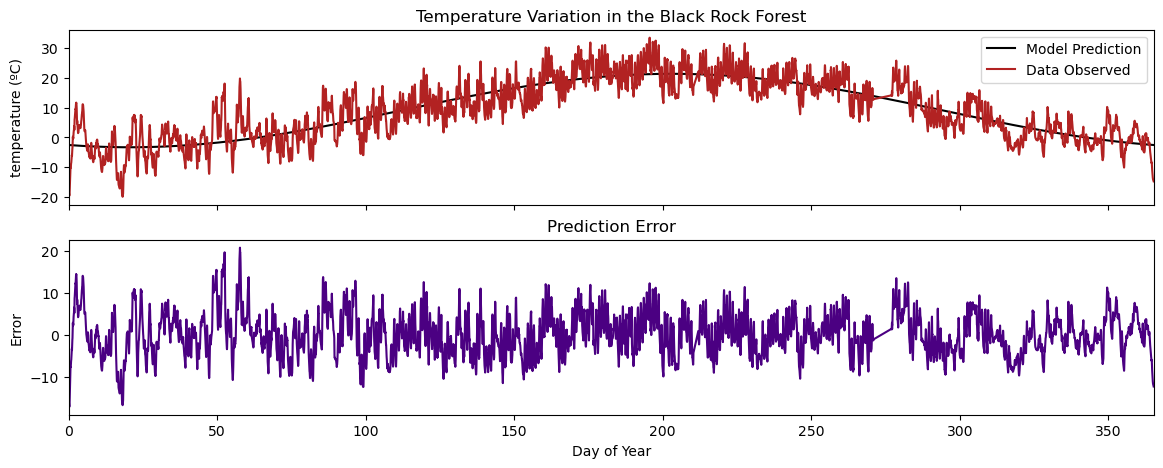

In [83]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (14,5), sharex = True)
ax[0].margins(x = 0)
ax[0].plot(t,dpre_trig, 'k-', label = "Model Prediction")
ax[0].plot(t, dobs, 'firebrick', label = "Data Observed")
ax[0].set_ylabel('temperature (ºC)')
ax[0].set_title("Temperature Variation in the Black Rock Forest")
ax[0].legend()

ax[1].margins(x = 0)
ax[1].plot(t,e, "indigo")
ax[1].set_xlabel('Day of Year')
ax[1].set_ylabel('Error')
ax[1].set_title('Prediction Error')